In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
# DEFINING THE PATH

Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/Part 6'

In [4]:
#importing data set

df = pd.read_csv(os.path.join(Path, 'zomato-last-version','01 Data','prepared data' , 'zomato_clean.csv'), index_col = False)

In [5]:
df.describe()

,Unnamed: 0,rate,votes,approx_cost(for two people)
count,23036.000000,23036.000000,23036.000000,23036.000000
mean,26052.290675,3.904337,604.973042,754.214707
std,14805.781332,0.426440,1117.569960,521.503949
min,0.000000,1.800000,0.000000,40.000000
25%,12957.750000,3.800000,103.000000,400.000000
50%,26566.500000,4.000000,224.000000,600.000000
75%,38745.250000,4.200000,591.000000,1000.000000
max,51715.000000,4.900000,16832.000000,6000.000000


In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
df.columns

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# Columns to delete
columns_to_delete = ["Unnamed: 0" , "address", "name", "online_order" , "book_table" , "phone" , "location" , "rest_type" , "cuisines" , "dish_liked" , "menu_item" , "reviews_list" , "listed_in(type)" , "listed_in(city)"]

In [9]:
df_last = df.drop(columns=columns_to_delete)

In [10]:
df_last

,rate,votes,approx_cost(for two people)
0,4.1,775,800
1,4.1,787,800
2,3.8,918,800
3,3.7,88,300
4,3.8,166,600
...,...,...,...
23031,3.8,128,1200
23032,3.9,77,2000
23033,2.8,161,1200
23034,2.5,81,800


In [11]:
score = [kmeans[i].fit(df_last).score(df_last) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/g

[-35034603309.253105,
 -17227699067.031815,
 -11256147599.003284,
 -7723135917.372704,
 -5990122009.523713,
 -4837433354.711998,
 -3870037770.9612455,
 -3213028306.391044,
 -2765900651.862672]

In [12]:
df_last.head ()

,rate,votes,approx_cost(for two people)
0,4.1,775,800
1,4.1,787,800
2,3.8,918,800
3,3.7,88,300
4,3.8,166,600


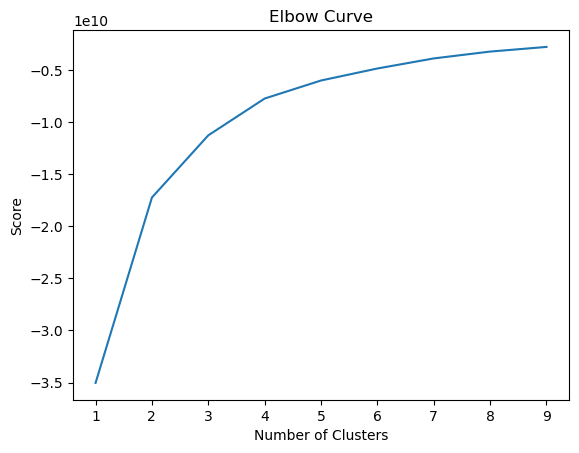

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [15]:
kmeans.fit(df_last)

/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
df_last['clusters'] = kmeans.fit_predict(df_last)

/Users/ghalebju/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
df_last.head()

,rate,votes,approx_cost(for two people),clusters
0,4.1,775,800,1
1,4.1,787,800,1
2,3.8,918,800,1
3,3.7,88,300,1
4,3.8,166,600,1


In [18]:
df_last['clusters'].value_counts()

1    16873
0     4031
3     1929
2      203
Name: clusters, dtype: int64

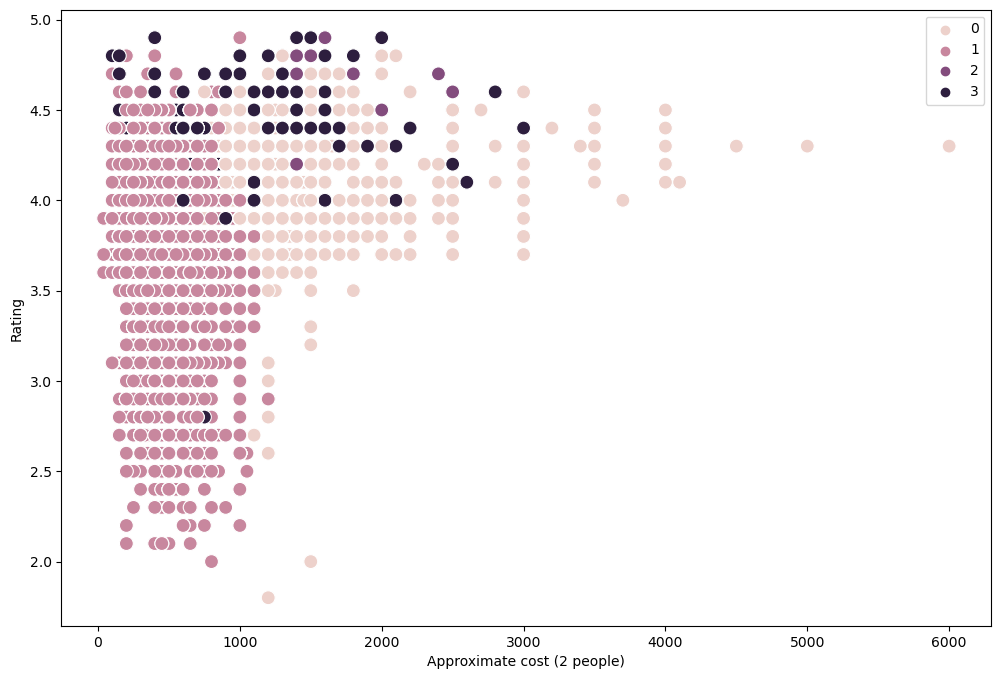

In [19]:
# Plot the clusters for the "Cost for two people" and "rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_last['approx_cost(for two people)'], y=df_last['rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Approximate cost (2 people)') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

In [20]:
df_last.to_csv(os.path.join(Path,'zomato-last-version','01 Data','prepared data', 'Zomato_last.csv'))